In [1]:
import numpy as np
from matplotlib import pyplot as plt

import witss

In [2]:
def brownian_motion(
    T: int,
    dt: float = 1,
    x0: float = 0,
    delta: float = .1,
) -> np.ndarray:
    x = np.random.normal(size=(T,), scale=delta*np.sqrt(dt))
    return np.cumsum(x) + x0

In [3]:
x = np.empty((10_000, 2))
x[:, 0] = brownian_motion(10_000)
x[:, 1] = brownian_motion(10_000)

itsum = witss.iss(
    x, "[1][1^(-1)][2]",
    semiring=witss.semiring.Arctic(),
)

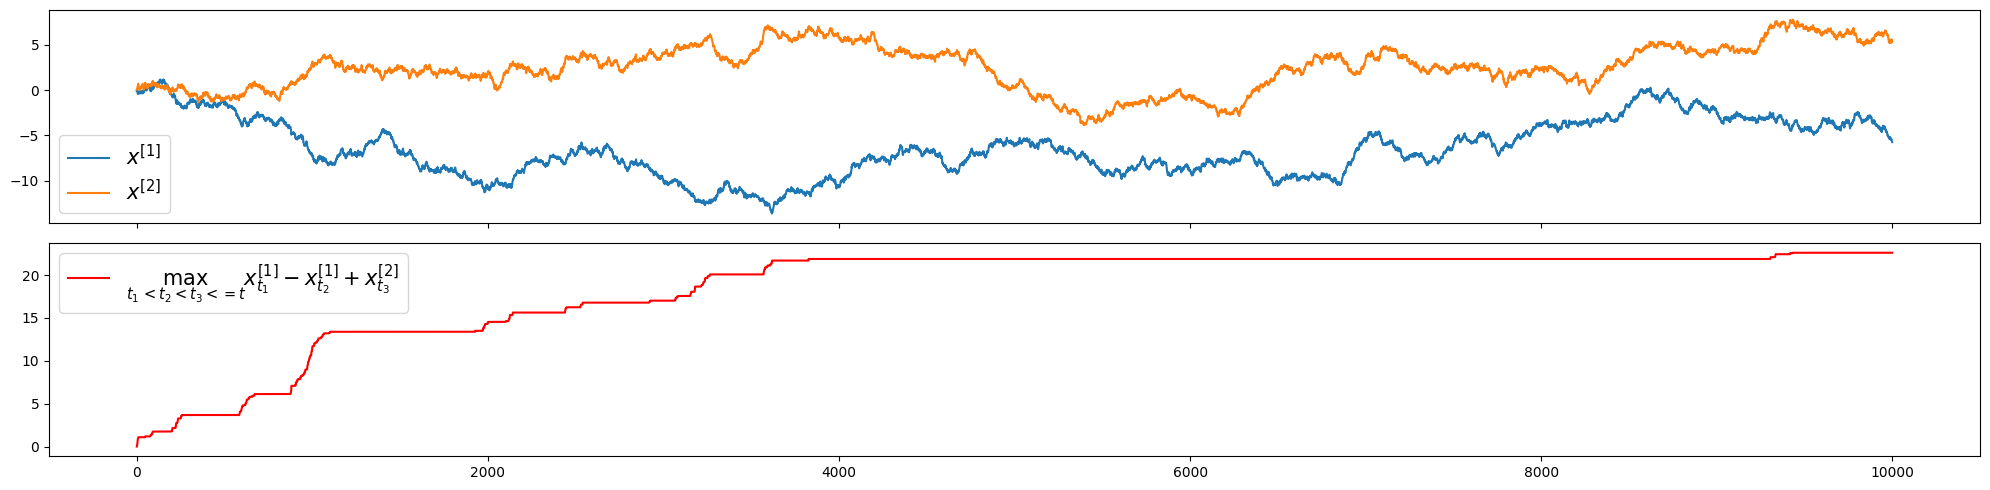

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 5))

ax[0].plot(x[:, 0], label=r"$x^{[1]}$")
ax[0].plot(x[:, 1], label=r"$x^{[2]}$")
ax[1].plot(itsum, label=r"$\max_{t_1<t_2<t_3<=t} x^{[1]}_{t_1}-x^{[1]}_{t_2}+x^{[2]}_{t_3}$", color="red")
ax[0].legend(loc="best", fontsize=15)
ax[1].legend(loc="best", fontsize=15)
fig.tight_layout()

### The `cumargmax` function

This is a result of an iterated sum in the arctic semiring.

The word `witss.Word("[1][1^(-1)][1]")` searches for a maximum, followed by a minimum,
followed by another maximum.

In the `witss.cumargmax` function, this word can also be specified as the string `"+-+"`.

In [5]:
x = brownian_motion(1000)
cam = witss.cumargmax(x, "+-+-+-+-")
print(x.shape, "-->", cam.shape)

(1000,) --> (1000, 8)


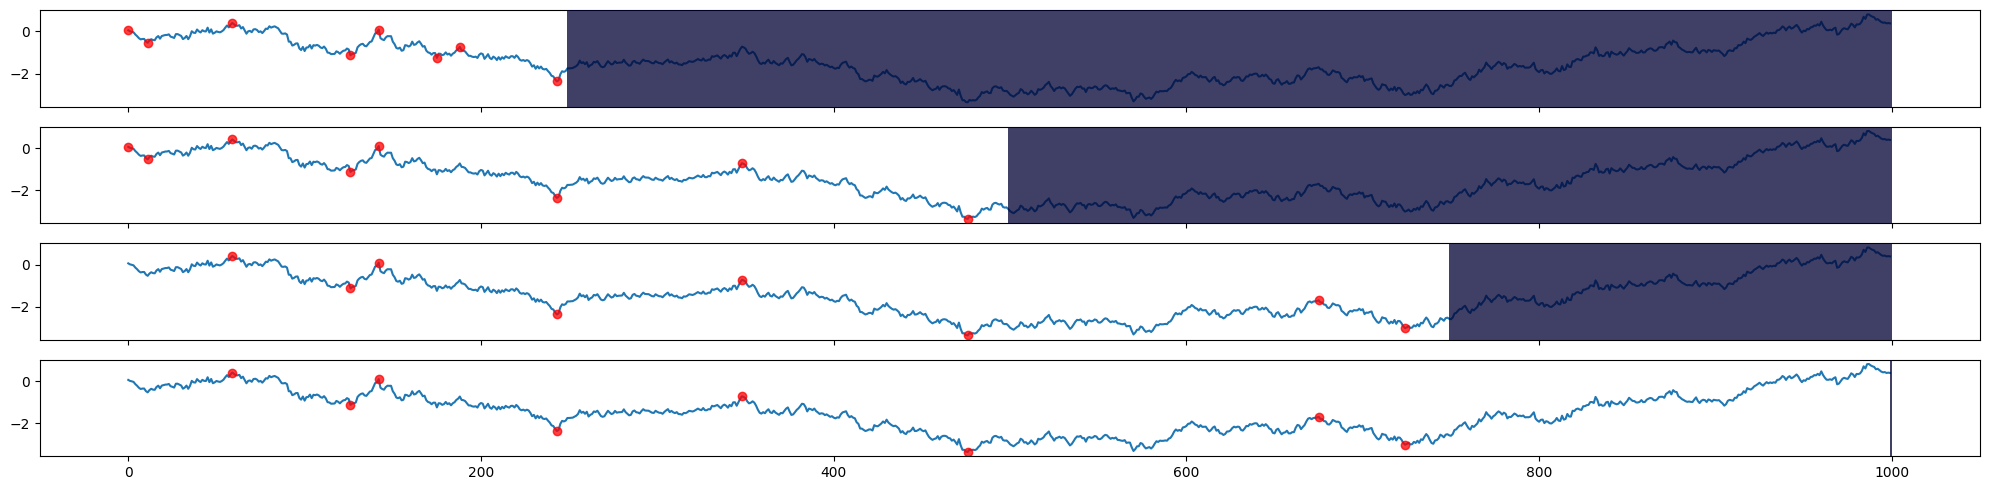

In [ ]:
up_to = [249, 499, 749, 999]

fig, ax = plt.subplots(len(up_to), 1, figsize=(20, 5), sharex=True)
for i, ut in enumerate(up_to):
    ax[i].plot(x)
    ax[i].plot(cam[ut], x[cam[ut]], "o", color=(1, 0, 0, 0.75))
    ax[i].axvspan(ut, 1000, facecolor=(0, 0, 0.2, 0.75), zorder=100)
fig.tight_layout()